In [1]:
# NOTEBOOK FOR TESTING GUNNERUS 3 DOF MANEUVERING MODEL
import matplotlib.pyplot as plt
import numpy as np

from simulator.gunnerus import GunnerusManeuvering3DoF
plt.style.use('seaborn-whitegrid')

C:\Users\j-ehy\AppData\Local\Temp\ipykernel_23452\2597218059.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
dt = 0.1                                # Timestep
simtime = 600                           # Simulation time: 10 minutes
t = np.arange(0, simtime, dt)           # time - array

vessel_model = GunnerusManeuvering3DoF(dt=0.1)

eta = np.zeros((len(t), 3))
nu = np.zeros((len(t), 3))
x = np.zeros((len(t), 6))

# Current speed and direction
Uc = 0.5                 # knots
beta_c = np.deg2rad(135) # Current going to south east

tau = np.zeros(3)       # No controll loads


for i in range(1, len(t)):
    _ = vessel_model.x_dot(Uc, beta_c, tau)
    vessel_model.integrate()
    eta[i] = vessel_model.get_eta()
    nu[i] = vessel_model.get_nu()
    x[i] = vessel_model._x

def plot_results():
    x[:, 2] = np.rad2deg(x[:, 2])
    x[:, 5] = np.rad2deg(x[:, 5])

    colors = ['blue', 'blue', 'blue', 'green', 'green', 'green']
    labels = ["N", "E", r'$\psi$', 'u', 'v', 'r']
    fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(18, 6))
    for i in range(6):
        if i < 3:
            plt.sca(axes[0, i])
        else:
            plt.sca(axes[1, i-3])
        plt.plot(t, x[:, i], color=colors[i], label=labels[i])
        plt.legend()
        plt.xlabel("$t \; [s]$")    

    plt.show()

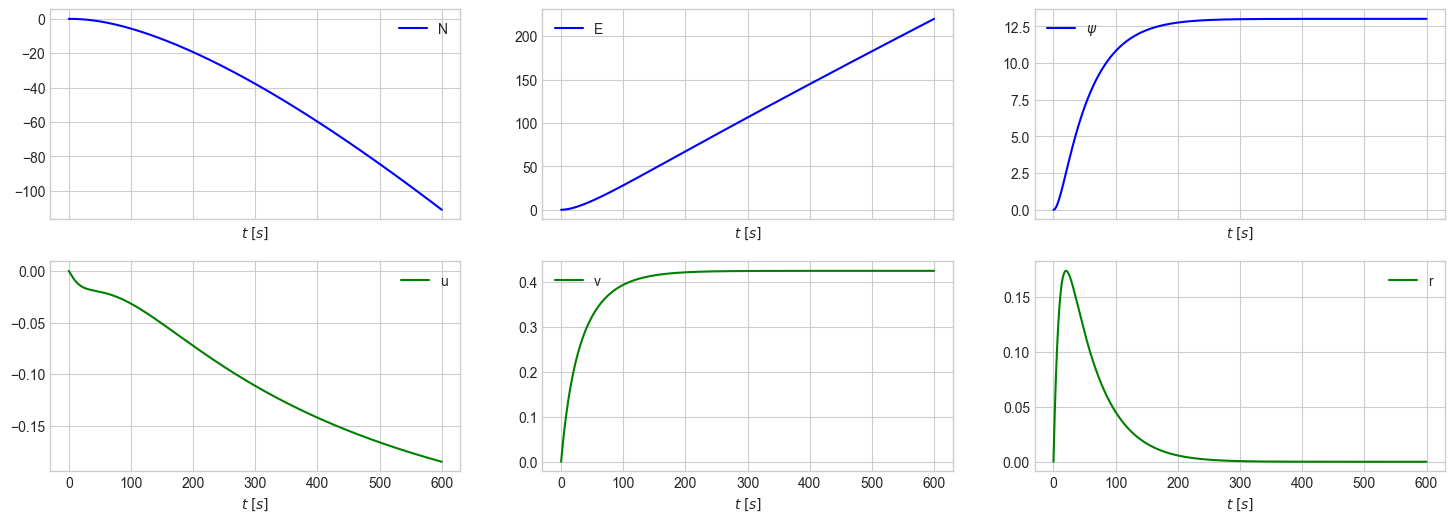

In [3]:
plot_results()

In [4]:
vessel_model.reset()

In [5]:
# Test with input from thrusters - forward thrust only

tau = np.zeros(3)
x = np.zeros((len(t), 6))
tau[2] = 1e4

for i in range(1, len(t)):
    vessel_model.x_dot(0, 0, tau)
    vessel_model.integrate()
    x[i] = vessel_model._x

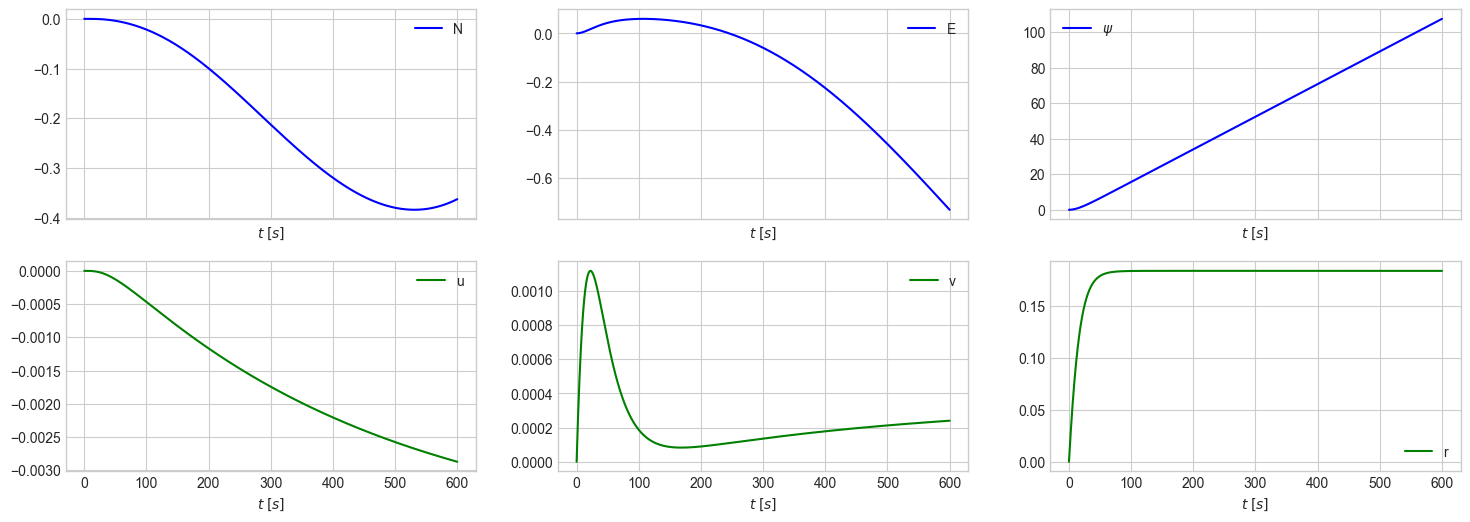

In [6]:
plot_results()